In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


def bases(D, x, y, alt=15):
    num_x = int(x/D)
    num_y = int(y/D)
    total = num_x*num_y
    n = np.array([])
    for i in range(num_y):
        for j in range(num_x):
            n = np.append(n, np.array([j*D,i*D,alt])) 
        
    return n.reshape(total,3)


In [2]:
n = bases(50, 200, 100)

In [3]:
n

array([[  0.,   0.,  15.],
       [ 50.,   0.,  15.],
       [100.,   0.,  15.],
       [150.,   0.,  15.],
       [  0.,  50.,  15.],
       [ 50.,  50.,  15.],
       [100.,  50.,  15.],
       [150.,  50.,  15.]])

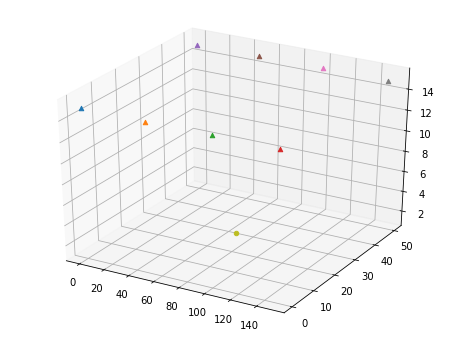

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(8):
    ax.scatter(n[i][0], n[i][1], n[i][2], marker='^')
ax.scatter(75, 25, 1.5, marker='o')

In [12]:
usuário = np.array([200*np.random.rand(1)[0],100*np.random.randn(1)[0],1.5])

In [13]:
usuário

array([ 39.73344407, -23.18334543,   1.5       ])

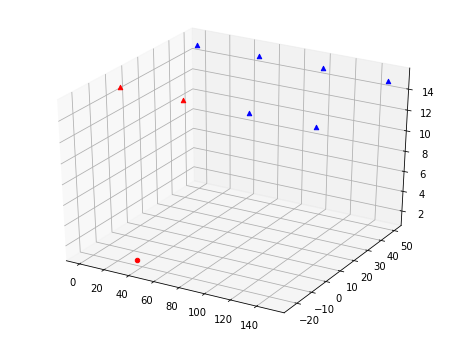

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(8):
    dist = np.linalg.norm(n[i]-usuário)
    if dist <= 50:
        ax.scatter(n[i][0], n[i][1], n[i][2], marker='^', c='red')
    else:
        ax.scatter(n[i][0], n[i][1], n[i][2], marker='^', c='blue')
ax.scatter(usuário[0], usuário[1], usuário[2], marker='o', c='red')